<a href="https://colab.research.google.com/github/micdist/fast.ai/blob/main/Lezione2_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -U fastbook
import fastbook
fastbook.setup_book()

In [5]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [8]:
key = os.environ.get('AZURE_SEARCH_KEY', '902511d642d44ccd983cdf8ca50331a3')

In [56]:
search_images_bing

<function fastbook.search_images_bing>

In [57]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [58]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [59]:
dest = 'images\grizzly.jpg'
download_url(ims[0], dest)

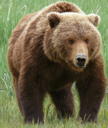

In [60]:
im = Image.open(dest)
im.to_thumb(128,128)

In [61]:
os.path.abspath('images')   

'/content/images'

In [62]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [63]:
#search for all 3 kinds of bear from bing
if not path.exists() :
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key,f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [64]:
fns = get_image_files(path)
fns

(#403) [Path('bears/black/00000142.png'),Path('bears/black/00000008.jpg'),Path('bears/black/00000133.jpg'),Path('bears/black/00000031.jpg'),Path('bears/black/00000035.jpg'),Path('bears/black/00000022.jpeg'),Path('bears/black/00000026.jpg'),Path('bears/black/00000043.jpg'),Path('bears/black/00000121.jpg'),Path('bears/black/00000038.jpg')...]

In [65]:
#verify existance of corrupted images
failed = verify_images(fns)
failed

(#3) [Path('bears/black/00000122.jpg'),Path('bears/grizzly/00000019.jpg'),Path('bears/grizzly/00000056.jpg')]

In [66]:
#verify_images returns an object of type L, which includes the map method
failed.map(Path.unlink);

dataLoaders: stores obj and make it avaiable as -train or -data

To turn  downloaded data into DataLoaders obj must tell fastai at least four things:
*   kind of data
*   where to get item list
*   how to label items
*  how to create validation set

dataBlock API customizes every stage of the creations of DataLoaders


dataBlock:
*   block: dati, label= grizzly, black, teddy
*   get_items: function to use to get data
*   splitter: how to split data validation/training, valid.30%, seed fixed per
*   get_y: label from path parents ex.: grizzly
*   item transform: ex resize












In [67]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [68]:
#creazione dataLoader
dls = bears.dataloaders(path)

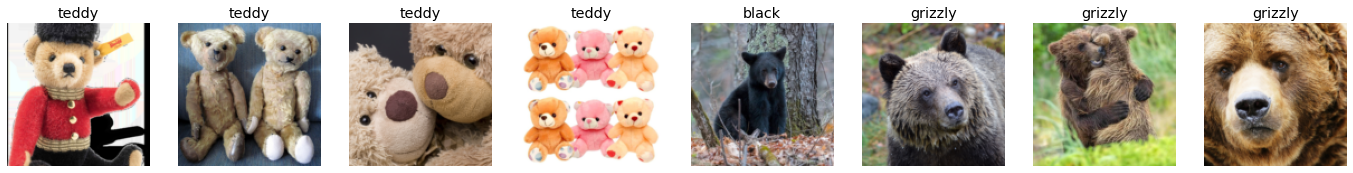

In [69]:
dls.valid.show_batch(max_n=8, nrows=1)

**TRAINING MODEL**

In [ ]:
#skip data augm


In [70]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [71]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.344205,0.146044,0.050000,00:17


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.252128,0.028559,0.012500,00:18
1,0.164025,0.006192,0.000000,00:17
2,0.118642,0.002921,0.000000,00:17
3,0.095014,0.003710,0.000000,00:17


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

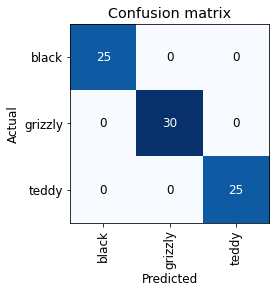

In [72]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

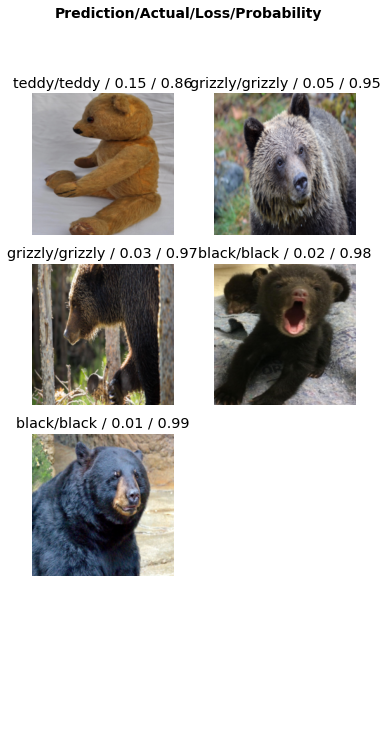

In [76]:
interp.plot_top_losses(5, nrows=4)

In [ ]:
#skip cleaner

**PRODUCTION**
create pikle file to upload on a server and treat as predefined program

PIKLE contains architecture and all params for the model

INFERENCE: use trained model on new data in production